# Process_Fire_Observations

## #!/usr/bin/env python
'''
    File name: Indices_from_IGRA-soundings.py
    Author: Andreas Prein
    E-mail: prein@ucar.edu
    Date created: 21.05.2017
    Date last modified: 21.05.2017

    ##############################################################
    Purpos:

    Read in the 

    Then we calculate the parameters that are important for hail
    environments and store them in a common format.

    The goal is to assess if there are trends in hail environments,
    which will be evaluated and displayed in a seperate program.

    inputs:

    returns:

'''

In [1]:
from dateutil import rrule
import datetime
from datetime import timedelta
import glob
from netCDF4 import Dataset
import sys, traceback
import dateutil.parser as dparser
import string
from pdb import set_trace as stop
import numpy as np
import numpy.ma as ma
import os
from mpl_toolkits import basemap
import pickle
import subprocess
import pandas as pd
from scipy import stats
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pylab as plt
import random
import scipy.ndimage as ndimage
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from pylab import *
import string
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile
import shapely.geometry
import shapefile
import math
from scipy.stats.kde import gaussian_kde
from math import radians, cos, sin, asin, sqrt
from shapely.geometry import Polygon, Point
from scipy.interpolate import interp1d
import csv
import os.path
import matplotlib.gridspec as gridspec
import matplotlib.path as mplPath
from scipy import stats
# from matplotlib.mlab import griddata
from cartopy import config
import cartopy.crs as ccrs
import cartopy
from cartopy.feature import NaturalEarthFeature
import cartopy.io.shapereader as shpreader
from shutil import copyfile
from matplotlib import path
from mpl_toolkits.basemap import Basemap; bm = Basemap()
import scipy
from scipy import signal
from matplotlib.widgets import RectangleSelector
from scipy import optimize

from numpy import linspace, meshgrid
# from matplotlib.mlab import griddata
import shapefile as shp
import matplotlib.path as mplPath
import pandas as pd

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

### User input section

In [2]:
StartTime=datetime.datetime(1984, 1, 1, 12)  #Y-M-D --> days are smallest possible period
StopTime=datetime.datetime(2016, 12, 31,12)
rgdTime = pd.date_range(StartTime, end=StopTime, freq='d')
rgiYears=np.unique(rgdTime.year)

sFireData='/glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/data/MTBS_CA_1984_2016.csv'
sSaveDataDir='/glade/work/prein/projects/2019_Janice-CA-Fire-WTs/data/'
Regions=['Bay_Area','Central_Coast','LA','Modoc','Northeast','San_Diego','Siearas_East','Siearas_West']
sShapefiles='/glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/Shapefiles/'
sPlotDir = '/glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/plots/Fire-Obs-Comparison/'

### Read the original fire dataset

In [3]:
DATA=pd.read_csv(sFireData)
Keys=DATA.keys()
lat=np.array(DATA['lat16'])
lon=np.array(DATA['lon16'])
YYYY=np.array(DATA['FIRE_YEAR'])
MM=np.array(DATA['FIRE_MON'])
DD=np.array(DATA['FIRE_DAY'])
FireID=np.array(DATA['FIRE_ID'])
AcresBurned=np.array(DATA['R_ACRES'])*0.00404686

### Plot overview of fire location and area burned

/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-424512.7559947008,-624457.2426770353,578105.2578416188,497030.3254126329&bboxSR=3310&imageSR=3310&size=1000,1118&dpi=96&format=png32&transparent=true&f=image
        Plot map to: /glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/plots/Fire-Obs-Comparison/Fire_Observations_LA-examples.pdf


findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


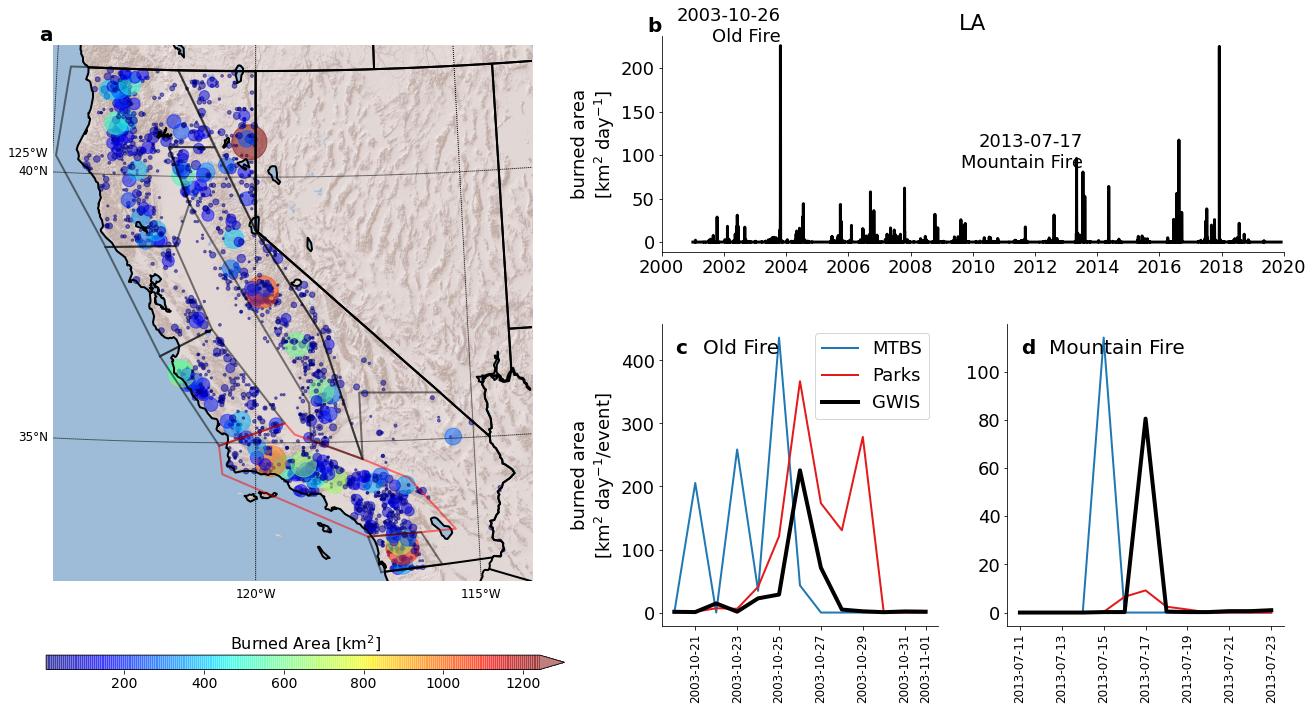

In [4]:
plt.rcParams.update({'font.size': 18})
rgsLableABC=list(string.ascii_lowercase)
fig = plt.figure(figsize=(18, 10))
gs1 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
gs1.update(left=0.03, right=0.4,
           bottom=0.15, top=0.98,
           wspace=0.1, hspace=0.1)
ax = fig.add_subplot(gs1[0,0])
plt.axis('off')
rllcrnrlat=32.3
urcrnrlat=42.3
llcrnrlon=-124.5
urcrnrlon=-113
m = Basemap(projection='mill',llcrnrlon=llcrnrlon ,llcrnrlat=rllcrnrlat,
            urcrnrlon=urcrnrlon ,urcrnrlat=urcrnrlat, resolution = 'i', epsg = 3310)

m.arcgisimage(service='World_Shaded_Relief', xpixels = 1000, verbose= True)
m.drawcoastlines(color='k', linewidth=2)
m.drawcountries(color='k', linewidth=2)
m.drawstates(color='k', linewidth=2)

parallels = np.arange(0.,81,5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,True,False], fontsize=12)
meridians = np.arange(10.,351.,5)
m.drawmeridians(meridians,labels=[True,False,False,True], fontsize=12)

# Plot the subregions
for re in range(len(Regions)):
    sf = shp.Reader(sShapefiles+Regions[re])
    df = read_shapefile(sf)
    for sf in range(df.shape[0]):
        ctr = df['coords'][sf]
        if len(ctr) > 10000:
            ctr=np.array(ctr)[::100,:] # carsen the shapefile accuracy
        else:
            ctr=np.array(ctr)
    XX,YY=m(ctr[:,0], ctr[:,1])
    if Regions[re] == 'LA':
        m.plot(XX,YY, c='r', lw=2, alpha=0.5)
    else:
        m.plot(XX,YY, c='k', lw=2, alpha=0.5)

xi,yi=m(lon,lat)
cs = m.scatter(xi,yi, c=AcresBurned, s=AcresBurned ,cmap='jet', alpha=0.5, label="fire location")
# c="Burned Area [km$^{2}$\,d$^{-1}$]"
# add colorbar for IVT
CbarAx = axes([0.025, 0.07, 0.4, 0.02])
cb = colorbar(cs, cax = CbarAx, orientation='horizontal', extend='max') #, ticks=np.arange(1,14,1))
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('Burned Area [km$^{2}$]', fontsize=16)
ax.text(0,1, rgsLableABC[0], ha='right',va='bottom', \
              transform = ax.transAxes, fontname="Times New Roman Bold", fontsize=20, weight='bold')



# ======================================
# Plot fire observation comparison
from Functions_Extreme_WTs import ExtremeDays
gs1 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
gs1.update(left=0.50, right=0.98,
           bottom=0.65, top=0.95,
           wspace=0.1, hspace=0.1)
ax = fig.add_subplot(gs1[0,0])

# load the data that was created from - /glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/programs/plots/Fire_Observations/Comarison_FireObs.ipynb
FireObs = "/glade/u/home/prein/projects/2019_Janice-CA-Fire-WTs/programs/plots/Fire_Observations/LA_Fire-Obs.npz"
DATA=np.load(FireObs)
DATA_all=DATA['DATA_all']
rgdTimeALL=DATA['rgdTimeALL']
sDataset=DATA['sDataset']
ax = fig.add_subplot(gs1[0,0])
rgdTimeALL = pd.to_datetime(rgdTimeALL)

LabelFires=['Old Fire','Mountain Fire']
for da in [0]:
    ax = plt.subplot(gs1[da,0])
    plt.plot(rgdTimeALL, DATA_all[:,da], c='k', lw = 3)

    # label three biggest days
    FIN=~np.isnan(DATA_all[:,da])
    iTTex=ExtremeDays(DATA_all[:,da][FIN],5,7)
    TopDates=rgdTimeALL[FIN][ExtremeDays(DATA_all[:,da][FIN],5,7)]
    ii=0
    for ex in [0,4]: #range(len(iTTex)):
        plt.text(rgdTimeALL[FIN][iTTex[ex]], DATA_all[:,da][FIN][iTTex[ex]],\
                 str(TopDates[ex])[:10]+'\n'+LabelFires[ii], va='bottom', ha='right')
        ii=ii+1
    if da < 2:
        ax.set_ylabel('burned area\n[km$^{2}$ day$^{-1}$]')
    else:
        ax.set_ylabel('burned area\n[km$^{2}$ total]')
    if da == 2:
        ax.set_xlabel('years []')
    if da == 0:
        plt.title('LA')
        FinTopDates=TopDates
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.set_xlim([datetime.date(2000, 1, 1), datetime.date(2020, 1, 1)])
ax.text(0,1, rgsLableABC[1], ha='right',va='bottom', \
              transform = ax.transAxes, fontname="Times New Roman Bold", fontsize=20, weight='bold')

# plot top extreme events
gs2 = gridspec.GridSpec(1,2)
gs2.update(left=0.50, right=0.98,
           bottom=0.13, top=0.55,
           wspace=0.25, hspace=0.40)
COLORS=['k','#e31a1c','#1f78b4']
ii = 0
for ex in [0,4]: #range(len(TopDates[:2])):
    ax = plt.subplot(gs2[0,ii])
    iDD=np.where((rgdTimeALL.year == FinTopDates[ex].year) & (rgdTimeALL.month == FinTopDates[ex].month) & (rgdTimeALL.day == FinTopDates[ex].day))[0][0]
    DeltaD=6
    for da in range(3)[::-1]:
        if sDataset[da] == 'GWIS':
            lw=4
        else:
            lw=2
        plt.plot(rgdTimeALL[iDD-DeltaD:iDD+DeltaD+1],DATA_all[:,da][iDD-DeltaD:iDD+DeltaD+1],c=COLORS[da], label=sDataset[da], lw=lw)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks(rotation=90, fontsize=12)
    if ex == 0:
        plt.legend()
    if ii == 0:
        ax.set_ylabel('burned area\n[km$^{2}$ day$^{-1}$/event]')
    ax.text(0.05,0.95, rgsLableABC[2+ii], ha='left',va='top', \
                  transform = ax.transAxes, fontname="Times New Roman Bold", fontsize=20, weight='bold')
    ax.text(0.15,0.95, LabelFires[ii], ha='left',va='top', \
                  transform = ax.transAxes, fontname="Times New Roman Bold", fontsize=20)
    ii = ii+1
    

sPlotFile=sPlotDir
sPlotName= 'Fire_Observations_LA-examples.pdf'
if os.path.isdir(sPlotFile) != 1:
    subprocess.call(["mkdir","-p",sPlotFile])
print( '        Plot map to: '+sPlotFile+sPlotName)
fig.savefig(sPlotFile+sPlotName)

In [9]:
rgdTimeALL[FIN][ExtremeDays(DATA_all[:,da][FIN],5,7)]

DatetimeIndex(['2003-10-26', '2017-12-05', '2016-08-17', '2013-05-03',
               '2013-07-17'],
              dtype='datetime64[ns]', freq=None)

In [9]:
np.max(AcresBurned)

1241.6098322520002

In [12]:
np.sort(AcresBurned)[-3:]

array([1040.36595943, 1085.98864032, 1241.60983225])